Imports

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

Device Configuration

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


Hyper-prarameters

In [10]:
num_epochs = 10
batch_size = 4
learning_rate = 0.001

Data Prep

Files already downloaded and verified


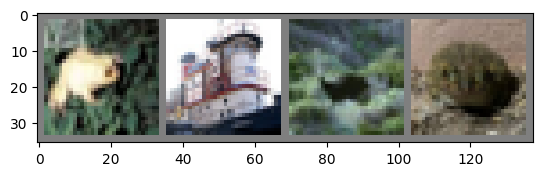

 frog  ship  bird  frog


In [11]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                             train=True,
                                             transform=transform,
                                             download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data',
                                            train=False,
                                            transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                             batch_size=batch_size,
                                             shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                            batch_size=batch_size,
                                            shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
              'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

CNN Model

In [12]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

Loss and Optimizer

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Training Loop

In [14]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item()}')
    
print('Finished Training')

Epoch [1/10], Step [2000/12500], Loss: 2.2929728031158447
Epoch [1/10], Step [4000/12500], Loss: 2.284817695617676
Epoch [1/10], Step [6000/12500], Loss: 2.1980862617492676
Epoch [1/10], Step [8000/12500], Loss: 2.3448586463928223
Epoch [1/10], Step [10000/12500], Loss: 2.0207347869873047
Epoch [1/10], Step [12000/12500], Loss: 1.6886794567108154
Epoch [2/10], Step [2000/12500], Loss: 2.076357126235962
Epoch [2/10], Step [4000/12500], Loss: 2.877676010131836
Epoch [2/10], Step [6000/12500], Loss: 1.5200541019439697
Epoch [2/10], Step [8000/12500], Loss: 2.0678720474243164
Epoch [2/10], Step [10000/12500], Loss: 1.3518579006195068
Epoch [2/10], Step [12000/12500], Loss: 1.752353310585022
Epoch [3/10], Step [2000/12500], Loss: 1.5887013673782349
Epoch [3/10], Step [4000/12500], Loss: 2.2204461097717285
Epoch [3/10], Step [6000/12500], Loss: 1.199295997619629
Epoch [3/10], Step [8000/12500], Loss: 1.9315413236618042
Epoch [3/10], Step [10000/12500], Loss: 1.2690117359161377
Epoch [3/10], 

Evaluate

In [15]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1
    
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Accuracy of the network on the 10000 test images: 55.15 %
Accuracy of plane: 57.4 %
Accuracy of car: 74.4 %
Accuracy of bird: 45.0 %
Accuracy of cat: 24.1 %
Accuracy of deer: 40.2 %
Accuracy of dog: 45.0 %
Accuracy of frog: 63.0 %
Accuracy of horse: 71.2 %
Accuracy of ship: 71.6 %
Accuracy of truck: 59.6 %
